In [1]:
!pip install torch torchvision matplotlib seaborn scikit-learn opencv-python tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


In [1]:
import zipfile
import os
import random

In [3]:
zip_files = ['chest_xray.zip', 'train.zip', 'test.zip', 'val.zip']
for file in zip_files:
    if os.path.exists(file):
        print(f"Trying to unzip: {file}")
        try:
            with zipfile.ZipFile(file, 'r') as zip_ref:
                zip_ref.extractall(".")
        except zipfile.BadZipFile:
            print(f"❌ {file} is not a valid ZIP file.")
base_dir = "./chest_xray"

Trying to unzip: chest_xray.zip
Trying to unzip: train.zip
Trying to unzip: test.zip
Trying to unzip: val.zip


TF data MOdeller

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

class_names = list(train_generator.class_indices.keys())


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


CNN Model

In [5]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(2),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

Train Model

In [6]:
EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.7508 - loss: 0.7571 - val_accuracy: 0.8125 - val_loss: 0.4095
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.8733 - loss: 0.2981 - val_accuracy: 0.8750 - val_loss: 0.4131
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.9023 - loss: 0.2514 - val_accuracy: 0.6875 - val_loss: 0.7909
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.9122 - loss: 0.2312 - val_accuracy: 0.8125 - val_loss: 0.4807
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.9181 - loss: 0.2005 - val_accuracy: 0.7500 - val_loss: 0.7977
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.9146 - loss: 0.2158 - val_accuracy: 0.8750 - val_loss: 0.3943
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.9197 - loss: 0.2002 - val_accuracy: 0.8125 - val_loss: 0.6695
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.9270 - loss: 0.1825 - val_accu

Evaluation

In [7]:
loss, acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {acc * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 337ms/step - accuracy: 0.7942 - loss: 0.6235
✅ Test Accuracy: 86.86%


Confusion Matrix

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 327ms/step
              precision    recall  f1-score   support

      NORMAL       0.93      0.70      0.80       234
   PNEUMONIA       0.84      0.97      0.90       390

    accuracy                           0.87       624
   macro avg       0.89      0.84      0.85       624
weighted avg       0.88      0.87      0.86       624



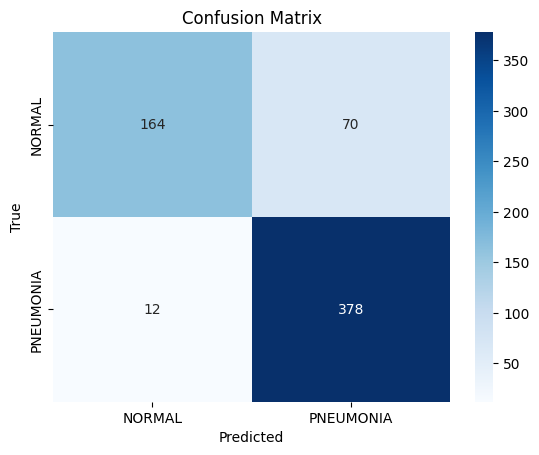

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true and predicted labels
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Visualization

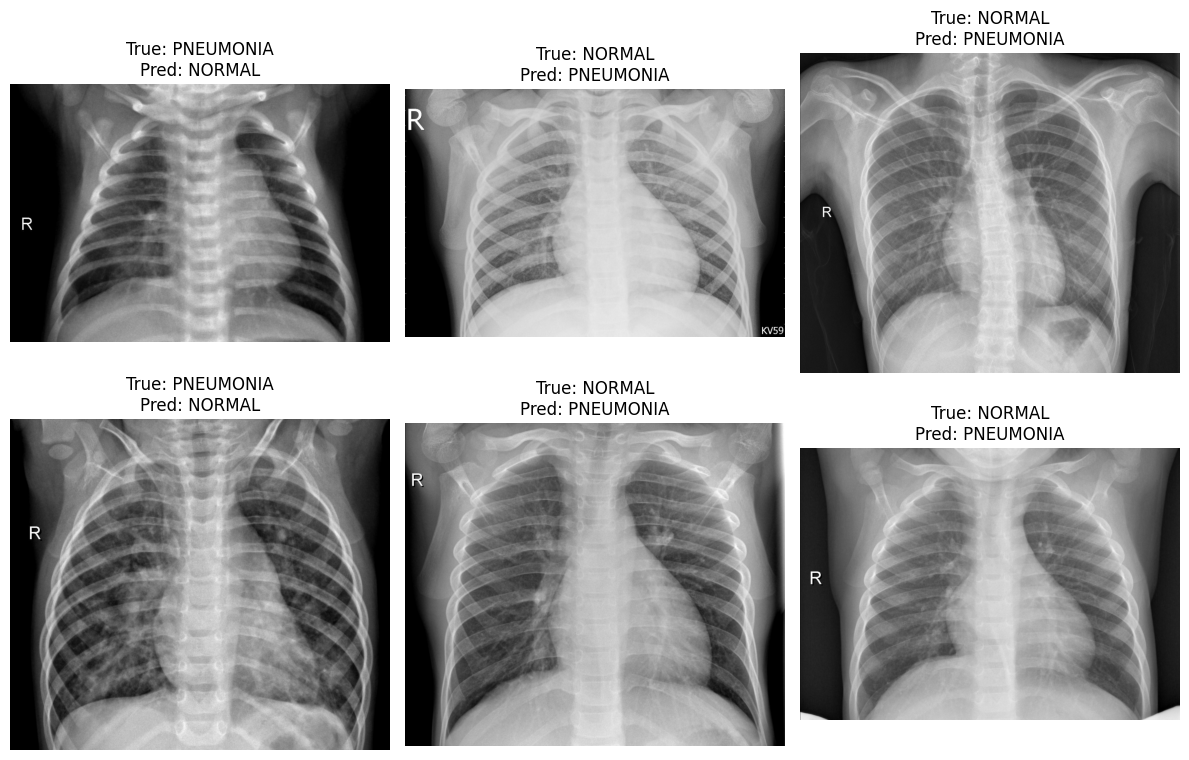

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# Get file paths
file_paths = test_generator.filepaths
misclassified = [i for i, (a, b) in enumerate(zip(y_true, y_pred)) if a != b]

plt.figure(figsize=(12, 8))
for i, idx in enumerate(random.sample(misclassified, min(6, len(misclassified)))):
    img_path = file_paths[idx]
    img = Image.open(img_path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img.convert("L"), cmap='gray')
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
